In [17]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=\frac{1}{\tau}2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=\frac{ 1}{\tau}2^{-t/\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [98]:
tau=3.052*60 #seconds      
NThallium=[1000]
NLead=[0]

def p(t):
    return (2**(-t/tau))/tau

for t in range(1,5*int(tau)):
    x=p(t)
    decayed=0
    for j in range(NThallium[-1]):
        y=np.random.rand()
        if (y < x) : decayed+=1
    NThallium.append(NThallium[-1]-decayed)
    NLead.append(NLead[-1]+decayed)

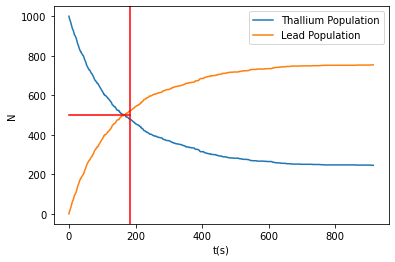

In [99]:
T=range(int(5*tau))
plt.plot(T,NThallium, label="Thallium Population")
plt.plot(T,NLead, label= "Lead Population")
plt.xlabel("t(s)")
plt.ylabel("N")
plt.axvline(x=tau, c="red")
plt.plot(np.linspace(0,tau,2),NThallium[0]/2*np.ones(2), c="red")
plt.legend()

Using the inverse transform method we get that:
- if z is uniformly distributed in [0,1]
- if t distributed as $p(t)=\frac{ 1}{\tau}2^{-t/\tau}$

$\rightarrow t(z)=- \tau log_2(1-z)$

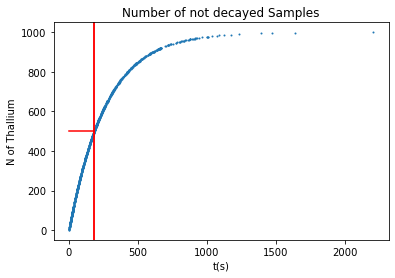

In [100]:
def t(z):
    return -tau*np.log2(1-z)

times=t(np.random.rand(1000))
plt.scatter(times, NThallium[0]*(1-2**(-times/tau)), s=1)
plt.title("Number of not decayed Samples")
plt.xlabel("t(s)")
plt.ylabel("N of Thallium")
plt.axvline(x=tau, c="red")
plt.axvline(x=tau, c="red")
plt.plot(np.linspace(0,tau,2),NThallium[0]/2*np.ones(2), c="red")
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [27]:
E = 7.7*1.6*10**(-13) #J
Z = 79 
N = 1000000
a_0 = 5.29 * 10**(-11)  # m
sigma = a_0/100

# beam in radial coordinates
b = np.random.normal(0, sigma, size=N)

e = 1.6*10**(-19) #C
eps_0 = 8.85*10**(-12) #C^2/(Nm^2)

def angle(Z,E,b): return np.arctan((Z*e**2)/(2*np.pi*eps_0*E*b))*2

back = 0
for r in b:
    if angle(Z,E,r) > np.pi/2:
        back += 1

print("Percentage of bounced back particles:", np.round(back/N*100), "%")


Percentage of bounced back particles: 2.0 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [102]:
# hit/miss method
def f(x):  
    return (np.sin(1/(x*(2-x))))**2
I=[]
N=10000
boxArea=2
for n in range(100):
    count=0
    for i in range(N):
        x=2*np.random.random()
        y=np.random.random()
        if y<f(x): count+=1
    I.append(count*boxArea/N)
print("Area=",np.mean(I), "+-", np.std(I))


Area= 1.4517839999999995 +- 0.008463837427550231


In [105]:
#mean value methdod
N=10000
collection=[f(x) for x in np.random.rand(N)]
I=2/N*np.sum(collection)
sigma=2*np.std(collection)/np.sqrt(N)
print("Area with the mean value method:", I, "+-", sigma)


Area with the mean value method: 1.4501716462158256 +- 0.0053103603030968186


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [106]:
def circle(x):
    return np.dot(x,x)
I=[]

N=100000
Area_box=4
for n in range(100):
    count=0
    for i in range(N):
        x=2*np.random.random(2)-1
        if circle(x)<1 : count+=1
    I.append(count*Area_box/N)
print(np.mean(I), "+-", np.std(I))


3.1418188000000002 +- 0.005672497735565887


In [107]:
def sphere_10d(x): 
    return np.dot(x,x)
N=1000000
Area_box=2**10
I=[]
for n in range(10):
    count=0
    for i in range(N):
        x=2*np.random.rand(10)-1
        if sphere_10d(x)<1 : count+=1
    I.append(count*Area_box/N)
print(np.mean(I), "+-", np.std(I))
print("Real Value:", np.pi**5/(5*4*3*2))

2.5378815999999995 +- 0.037521461600529354
Real Value: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [120]:
N=1000000
def w(x): return 1./np.sqrt(x)
def f(x): return 1/(np.e**x+1)
Z=2 #integral of w(x)
z=np.random.rand(N)
x= z**2 #I used the inverse transfrom
collection=f(x)
I=Z/N*np.sum(collection)
sigma=2*np.std(collection)/np.sqrt(N)
print("Area with the mean value method:", I, "+-", sigma)

Area with the mean value method: 0.8389998763835071 +- 0.0001408751007378566
